In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 200)


In [11]:
results0 = pd.read_csv('results_0.csv').iloc[:, 10:]
results1 = pd.read_csv('results_1.csv').iloc[:, 10:]
results2 = pd.read_csv('results_2.csv').iloc[:, 10:]
results3 = pd.read_csv('results_3.csv').iloc[:, 10:]
results4 = pd.read_csv('results_4.csv').iloc[:, 10:]

parameters0 = pd.read_csv('parameters_0.csv').iloc[:, 2:]

results0 = pd.concat([parameters0, results0], axis=1)
results1 = pd.concat([parameters0, results1], axis=1)
results2 = pd.concat([parameters0, results2], axis=1)
results3 = pd.concat([parameters0, results3], axis=1)
results4 = pd.concat([parameters0, results4], axis=1)

results = pd.concat([results0, results1, results2, results3, results4])

In [12]:
tabla_comparadora = results.groupby(['n_N', 'single', 'perc_B', 'k', 'wL', 'init']).mean()[['Gap', 'Runtime', 'ObjVal']].round(2).reset_index()
tabla_comparadora

,n_N,single,perc_B,k,wL,init,Gap,Runtime,ObjVal
0,10,False,0.1,0.10,0,False,0.00,2.30,359.37
1,10,False,0.1,0.10,0,True,0.00,1.43,359.37
2,10,False,0.1,0.10,50,False,0.00,2.19,617.37
3,10,False,0.1,0.10,50,True,0.00,1.80,617.38
4,10,False,0.1,0.25,0,False,0.00,5.45,213.78
5,10,False,0.1,0.25,0,True,0.00,2.79,213.78
6,10,False,0.1,0.25,50,False,0.00,3.14,466.47
7,10,False,0.1,0.25,50,True,0.00,2.13,466.46
8,10,False,0.1,1.00,0,False,0.00,2.33,359.37
9,10,False,0.1,1.00,0,True,0.00,1.43,359.37


c:\Users\G731\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\G731\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\G731\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\G731\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be r

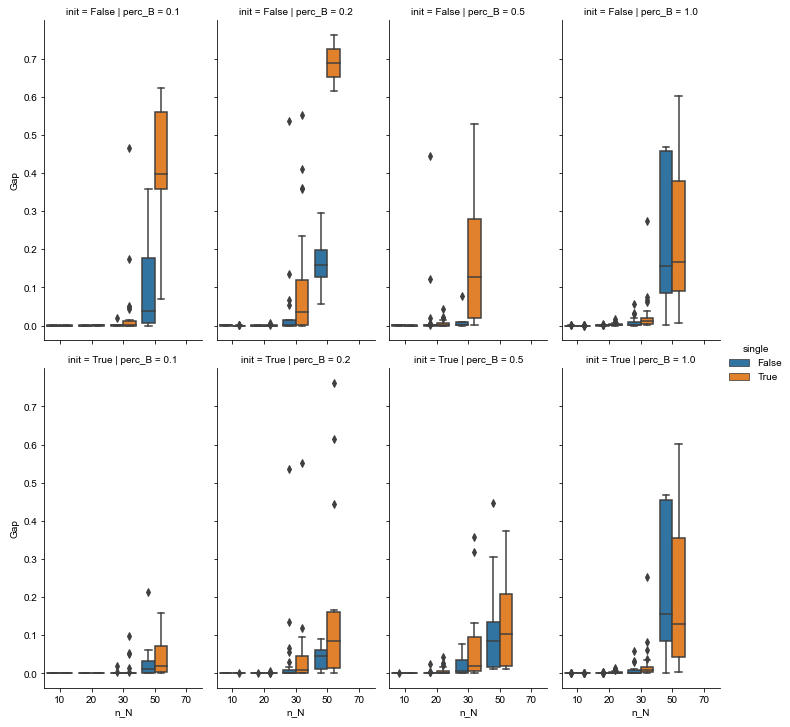

In [13]:
g = sns.catplot(x='n_N', y='Gap', hue='single', row = 'init', col='perc_B', kind='box', data=results, aspect=0.5, sharey=True)

sns.set(style="darkgrid")